---

## 📘 Statistics Overview

---

### 📌 **1. Import Required Libraries**

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
```

---

## 🔢 **2. Sample Dataset**

```python
data = pd.DataFrame({
    "Scores": [55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
})

data
```

---

## 📊 **3. Descriptive Statistics**

Mean, median, and mode summarize the central tendency of the data, helping us understand the typical or most common value in the dataset.

### ➤ Mean (Average)

```python
data["Scores"].mean()
```

### ➤ Median

```python
data["Scores"].median()
```

### ➤ Mode

```python
data["Scores"].mode()
```

---

## 📈 **4. Measures of Dispersion**

Variance, standard deviation, and range describe how spread out the data is, indicating the level of consistency or variability in observations.

### ➤ Variance

```python
data["Scores"].var()
```

### ➤ Standard Deviation

```python
data["Scores"].std()
```

### ➤ Range

```python
data["Scores"].max() - data["Scores"].min()
```

---

## 📦 **5. Quartiles & Percentiles**

Quartiles divide the data into four equal parts, showing how values are distributed and helping identify skewness and outliers.

```python
data["Scores"].quantile([0.25, 0.5, 0.75])
```

---

## 📉 **6. Data Distribution Visualization**

### ➤ Histogram

```python
plt.hist(data["Scores"], bins=5)
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.title("Score Distribution")
plt.show()
```

### ➤ Box Plot

```python
sns.boxplot(x=data["Scores"])
plt.title("Box Plot of Scores")
plt.show()
```

---

## 📐 **7. Probability Basics**

### ➤ Probability of Score ≥ 80

```python
probability = len(data[data["Scores"] >= 80]) / len(data)
probability
```

---

## 🔬 **8. Inferential Statistics**

Sampling allows us to analyze a subset of data to estimate population characteristics while reducing computational cost.

### ➤ Sampling

```python
sample = data["Scores"].sample(5, random_state=1)
sample
```

### ➤ Sample Mean vs Population Mean

```python
sample.mean(), data["Scores"].mean()
```

---

## 🧪 **9. Hypothesis Testing (t-test)**

Hypothesis testing determines whether observed results are statistically significant or likely due to random chance.

### ➤ One-Sample t-test

```python
from scipy.stats import ttest_1samp

t_stat, p_value = ttest_1samp(data["Scores"], popmean=70)
t_stat, p_value
```

📌 **Interpretation**

* If `p-value < 0.05` → Reject Null Hypothesis
* Else → Fail to reject

---

## 🔗 **10. Correlation**

Correlation quantifies the strength and direction of the relationship between two variables but does not imply causation.

```python
df = pd.DataFrame({
    "Hours_Studied": [1,2,3,4,5,6,7,8,9,10],
    "Scores": [50,55,60,65,70,75,80,85,90,95]
})

df.corr()
```

---

## 📈 **11. Simple Linear Regression**

Linear regression models the relationship between variables and enables prediction of outcomes based on input features.

```python
from sklearn.linear_model import LinearRegression

X = df[["Hours_Studied"]]
y = df["Scores"]

model = LinearRegression()
model.fit(X, y)

model.coef_, model.intercept_
```

---

# Causal Models

In [ ]:
import numpy as np
import statsmodels.api as sm

# Generate synthetic data
np.random.seed(42)
n_obs = 1000

# Endogenous variable (affected by the instrument)
endogenous_variable = np.random.normal(size=n_obs)

# Instrumental variable
instrument = np.random.normal(size=n_obs)

# Exogenous variable (independent of the instrument)
exogenous_variable = np.random.normal(size=n_obs)

# Error term
error = np.random.normal(size=n_obs)

# Causal relationship: endogenous_variable = beta * exogenous_variable + error
beta = 0.5
endogenous_variable = beta * exogenous_variable + error

# Instrumental variable regression
# IV model: endogenous_variable = gamma * instrument + delta * exogenous_variable + error
iv_model = sm.OLS(endogenous_variable, sm.add_constant(np.column_stack((instrument, exogenous_variable))))
iv_results = iv_model.fit()

# Display regression results
print(iv_results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     126.7
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           9.35e-50
Time:                        16:19:11   Log-Likelihood:                -1443.5
No. Observations:                1000   AIC:                             2893.
Df Residuals:                     997   BIC:                             2908.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0149      0.033     -0.457      0.6

Here’s a **short, clear explanation of each term** in the OLS regression output, written in **interview- and exam-friendly language**:

---

### **Model Overview**

* **Dep. Variable (y):** The target variable being predicted.
* **Model (OLS):** Ordinary Least Squares, a method that minimizes squared prediction errors.
* **Method (Least Squares):** Technique used to estimate coefficients.

---

### **Model Fit Metrics**

* **R-squared (0.203):** About **20.3%** of the variation in `y` is explained by the model.
* **Adj. R-squared (0.201):** R-squared adjusted for number of predictors; useful for model comparison.
* **F-statistic (126.7):** Tests whether the model as a whole is statistically significant.
* **Prob (F-statistic) (9.35e-50):** Very small value → the model is **overall significant**.

---

### **Model Size & Complexity**

* **No. Observations (1000):** Number of data points used.
* **Df Model (2):** Number of predictors (`x1`, `x2`).
* **Df Residuals (997):** Degrees of freedom left after fitting the model.

---

### **Information Criteria**

* **Log-Likelihood (-1443.5):** Measure of model fit; higher (less negative) is better.
* **AIC (2893):** Metric balancing model fit and complexity; lower is better.
* **BIC (2908):** Similar to AIC but penalizes complexity more strongly.

---

### **Coefficients Table**

* **coef:** Estimated impact of each variable on `y`.
* **std err:** Uncertainty in the coefficient estimate.
* **t:** Test statistic for whether the coefficient is different from zero.
* **P>|t|:** p-value for individual variable significance.
* **[0.025, 0.975]:** 95% confidence interval for the coefficient.

---

### **Coefficient Interpretation**

* **const:** Expected value of `y` when all predictors are zero (not significant here).
* **x1:** Negative effect on `y`, but **not statistically significant** at 5% level.
* **x2:** Strong positive effect on `y`, **highly statistically significant**.

---

### **Covariance Type**

* **nonrobust:** Assumes constant variance of errors (homoscedasticity).

---

### **One-Line Summary**

> The model is statistically significant overall, but only `x2` is a strong and reliable predictor of `y`.

If you want, I can also explain:

* how to **tell if assumptions are violated**
* what to **say in an interview in 30 seconds**
* how this output changes with **multicollinearity or heteroscedasticity**


# T F and Anova

Certainly! Here's a complete example that covers T-test, F-test (for two groups), and ANOVA (analysis of variance) tests, including null and alternative hypotheses, p-values, and interpretation of results. We'll use Python and the SciPy library for these statistical tests.

### T-Test Example:

Let's assume we have two groups of students, Group A and Group B, and we want to test if there's a significant difference in their exam scores. We set our significance level (alpha) to 0.05.

```python
import numpy as np
from scipy import stats

# Sample data for exam scores
group_a_scores = [85, 88, 92, 78, 90, 82, 87, 95, 88, 91]
group_b_scores = [72, 78, 68, 75, 84, 79, 70, 73, 77, 71]

# Perform a two-sample T-test
t_statistic, p_value = stats.ttest_ind(group_a_scores, group_b_scores)

# Define null and alternative hypotheses
# Null Hypothesis (H0): There is no significant difference in the exam scores between Group A and Group B.
# Alternative Hypothesis (H1): There is a significant difference in the exam scores between Group A and Group B.

# Check the p-value against alpha (0.05)
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in exam scores.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in exam scores.")
```

**Interpretation**: In this T-test, if the p-value is less than our chosen significance level (alpha), which is 0.05, we reject the null hypothesis. In this case, we reject the null hypothesis, suggesting that there is a significant difference in exam scores between Group A and Group B.

### F-Test (Two Groups) Example:

Now, let's consider an F-test for comparing variances between two groups. We'll use the same groups as above.

```python
# Perform an F-test for comparing variances
f_statistic, p_value = stats.levene(group_a_scores, group_b_scores)

# Define null and alternative hypotheses
# Null Hypothesis (H0): The variances of exam scores in Group A and Group B are equal.
# Alternative Hypothesis (H1): The variances of exam scores in Group A and Group B are not equal.

# Check the p-value against alpha (0.05)
if p_value < alpha:
    print("Reject the null hypothesis. Variances are not equal between the groups.")
else:
    print("Fail to reject the null hypothesis. Variances are equal between the groups.")
```

**Interpretation**: In this F-test, if the p-value is less than our chosen significance level (alpha), we reject the null hypothesis, indicating that the variances of exam scores in Group A and Group B are not equal.

### ANOVA Test Example:

Now, let's perform an ANOVA test to compare exam scores among multiple groups.

```python
# Sample data for exam scores in three groups
group_1_scores = [80, 85, 88, 78, 82]
group_2_scores = [72, 76, 80, 78, 75]
group_3_scores = [90, 92, 85, 88, 91]

# Perform a one-way ANOVA test
f_statistic, p_value = stats.f_oneway(group_1_scores, group_2_scores, group_3_scores)

# Define null and alternative hypotheses
# Null Hypothesis (H0): There is no significant difference in exam scores among the groups.
# Alternative Hypothesis (H1): There is a significant difference in exam scores among the groups.

# Check the p-value against alpha (0.05)
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in exam scores among the groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in exam scores among the groups.")
```

**Interpretation**: In this ANOVA test, if the p-value is less than our chosen significance level (alpha), we reject the null hypothesis, suggesting that there is a significant difference in exam scores among the groups.

These examples cover common hypothesis tests (T-test, F-test, and ANOVA) and demonstrate how to set up null and alternative hypotheses, calculate p-values, and interpret the results based on a significance level of 0.05.

# BV trade off

[1.2](http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/#:~:text=Varia,E%5B%CB%86y%5D)


[Understanding the Bias-Variance Tradeoff - ](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)Seema Singh

In [ ]:
import numpy as np
import random
#checking random assignment for NLP HW 2

In [ ]:
for i in range(5):
  print(np.random.uniform(0.7,1))

In [ ]:
for i in range(1):
  print(np.random.rand(8))

# Math Operations and Matrix Multiplication

In [ ]:
import numpy as np

# Create a numpy array
array_2d = np.array([[1, 2, 3, 4],
                    [5, 6, 7, 8],
                    [9, 10, 11, 12]])

# Print the array
print("Numpy array:")
print(array_2d)

# Output:
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]

# Get the shape
shape = array_2d.shape
print("\nShape of the array:", shape)

# Output:
# Shape of the array: (3, 4)

In [ ]:
import numpy as np

A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

print(A @ B)
print( B @ A)
print( A * B)
print( B * A)
print(np.dot(A, B))
print(np.dot(B, A))


[[19 22]
 [43 50]]
[[23 34]
 [31 46]]
[[ 5 12]
 [21 32]]
[[ 5 12]
 [21 32]]
[[19 22]
 [43 50]]
[[23 34]
 [31 46]]


In [ ]:
A = [[6, 7, 2],
      [8, 9, 4]]

print("element :", np.array(A) [1,0],'length :', len(A),'breadth :', len(A[1]))

element : 8 length : 2 breadth : 3


In [ ]:
B = [[1, 2],  [2, 4], [3, 6]]

print(np.dot(A,B)) # print(np.matmul(A,B))
print(np.dot(B,A))

[[26 52]
 [38 76]]
[[22 25 10]
 [44 50 20]
 [66 75 30]]


In [ ]:
print(np.multiply(B,B))  # errors on print(np.multiply(A,B))

[[ 1  4]
 [ 4 16]
 [ 9 36]]


In [ ]:
import torch
input = torch.rand(2, 3, 4)
mat2 = torch.rand(2, 4, 5)
res = torch.bmm(input, mat2)
some = input @ mat2
res.size()

torch.Size([2, 3, 5])

In [ ]:
res, some

(tensor([[[0.5168, 0.6440, 0.9305, 0.8087, 1.0702],
          [0.5766, 0.7439, 1.1336, 0.9120, 1.1290],
          [0.2615, 0.4811, 0.7507, 0.5082, 0.6433]],
 
         [[1.0433, 1.2360, 1.1280, 0.6963, 1.3078],
          [0.3151, 0.6792, 0.5011, 0.3955, 0.4956],
          [1.3053, 2.3409, 1.7482, 1.3660, 1.9550]]]),
 tensor([[[0.5168, 0.6440, 0.9305, 0.8087, 1.0702],
          [0.5766, 0.7439, 1.1336, 0.9120, 1.1290],
          [0.2615, 0.4811, 0.7507, 0.5082, 0.6433]],
 
         [[1.0433, 1.2360, 1.1280, 0.6963, 1.3078],
          [0.3151, 0.6792, 0.5011, 0.3955, 0.4956],
          [1.3053, 2.3409, 1.7482, 1.3660, 1.9550]]]))

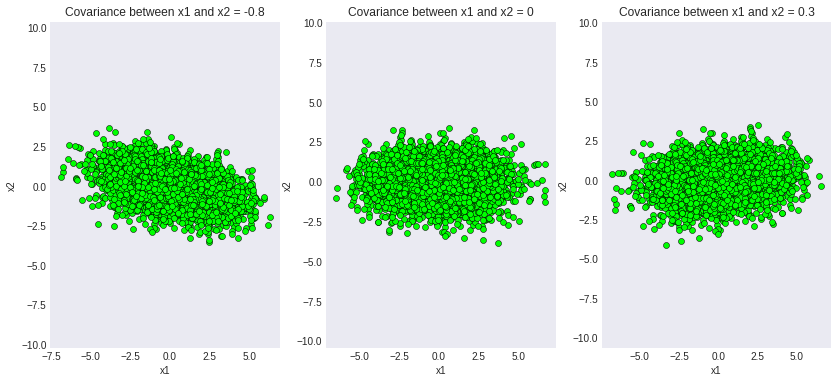

In [ ]:
# Importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6

# Initializing the random seed
random_seed=1000

# List containing the variance
# covariance values
cov_val = [-0.8, 0, 0.3]

# Setting mean of the distributino to
# be at (0,0)
mean = np.array([0,0])

# Iterating over different covariance
# values
for idx, val in enumerate(cov_val):
	plt.subplot(1,3,idx+1)

	# Initializing the covariance matrix
	cov = np.array([[4, val], [val, 1]])

	# Generating a Gaussian bivariate distribution
	# with given mean and covariance matrix
	distr = multivariate_normal(cov = cov, mean = mean,
								seed = random_seed)

	# Generating 5000 samples out of the
	# distribution
	data = distr.rvs(size = 5000)

	# Plotting the generated samples
	plt.plot(data[:,0],data[:,1], 'o', c='lime',
			markeredgewidth = 0.5,
			markeredgecolor = 'black')
	plt.title(f'Covariance between x1 and x2 = {val}')
	plt.xlabel('x1')
	plt.ylabel('x2')
	plt.axis('equal')

plt.show()


In [ ]:
n1 = 1997
n2 = 904
n3 = 906
n4 = 32

x = np.array([[n4+n1, n1, n1],[n2, n4+n2,n2],[n3,n3,n3+n4]])

x

In [ ]:
y = np.array([n1,n2,n3])
y

In [ ]:
print(np.linalg.inv(x))

In [ ]:
np.dot(y.T,np.linalg.inv(x))

In [ ]:
import torch
def affine_func(w, x, b):
    result_by_affine = torch.mm(x.T,w)+b
    print("result_by_affine:\n",result_by_affine)
def linear_func(w, x, b):
    mat_ones = torch.ones(x.shape[1]).unsqueeze(0)
    mat_x_1 = torch.cat((x,mat_ones),0)
    mat_w_b = torch.cat((w,torch.tensor([b]).unsqueeze(0)),0)

    result_by_linear = torch.mm(mat_x_1.T, mat_w_b)
    print("\nresult_by_linear:\n",result_by_linear)

w = torch.tensor([1.,2.]).unsqueeze(1)
x = torch.randn([2,3])
b = 4.
affine_func(w,x,b)
linear_func(w,x,b)

result_by_affine:
 tensor([[2.1953],
        [6.3023],
        [5.2141]])

result_by_linear:
 tensor([[2.1953],
        [6.3023],
        [5.2141]])


# Model Evaluation: Overview
Model evaluation is the process of assessing how well a machine learning model performs. It ensures the model’s predictions are accurate and reliable, whether for regression or classification tasks. Proper evaluation helps select the best model, fine-tune hyperparameters, and avoid overfitting.

---

### Evaluation for Regression Models:
Regression models predict continuous numerical outputs. Common metrics include:

1. **Mean Absolute Error (MAE):**
   Measures the average absolute difference between predicted and actual values.
   - Formula:  
     
     $MAE = \frac{\sum_{i=1}^{n} |y_i - \hat{y}_i|}{n}$
     

2. **Mean Squared Error (MSE):**
   Penalizes larger errors more heavily by squaring the differences.
   - Formula:  
     
     $MSE = \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{n}$
     

3. **Root Mean Squared Error (RMSE):**
   Square root of MSE, providing error in the same units as the target variable.
   - Formula:  
     
     $RMSE = \sqrt{MSE}$
     

4. **R-squared ($R^2$):**
   Indicates how much variance in the target variable is explained by the model.  
   - Formula:  
     $
     R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
     $

5. **Adjusted \(R^2\):**
   Accounts for the number of predictors in the model to avoid overestimation.

---

### Evaluation for Classification Models:
Classification models predict discrete labels or categories. Key metrics include:

1. **Accuracy:**
   Proportion of correctly classified instances.
   - Formula:  
     $
     Accuracy = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Samples}}
     $

2. **Precision:**
   Measures the proportion of positive predictions that are correct.
   - Formula:  
     $
     Precision = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
     $

3. **Recall (Sensitivity or TPR):**
   Measures the proportion of actual positives identified correctly.
   - Formula:  
     $
     Recall = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
     $

4. **F1 Score:**
   Harmonic mean of precision and recall. Balances the trade-off between them.
   - Formula:  
     $
     F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
     $

5. **ROC-AUC:**
   Evaluates the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR) across thresholds.

6. **Confusion Matrix:**
   A table showing true positives, true negatives, false positives, and false negatives.

7. **Log Loss:**
   Measures the model's probability estimates for classification tasks.

---

### Techniques for Model Evaluation:
1. **Train-Test Split:**  
   Divide data into training and testing subsets (e.g., 80/20 split).

2. **Cross-Validation:**  
   - **k-Fold Cross-Validation:** Split data into \(k\) subsets, train on \(k-1\), test on 1, and repeat.
   - **Stratified k-Fold:** Ensures balanced distribution of classes in each fold (used for imbalanced classification).

3. **Nested Cross-Validation:**  
   Used for model selection and hyperparameter tuning, avoiding information leakage.

4. **Leave-One-Out Cross-Validation (LOOCV):**  
   Trains on all data except one instance and repeats for all data points.



# Hypothesis testing

![Type-I-and-Type-II-Errors.webp](attachment:Type-I-and-Type-II-Errors.webp)

![IMG_1627.jpg](attachment:IMG_1627.jpg)

![type-i-and-ii-error-2.png](attachment:type-i-and-ii-error-2.png)

In hypothesis testing, **Type I error** and **Type II error** represent two different types of statistical errors:

1. **Type I Error (False Positive)**: This occurs when the null hypothesis is rejected when it is actually true.
2. **Type II Error (False Negative)**: This occurs when the null hypothesis is not rejected when it is actually false.

### Why We Focus on Type I Error for Confidence Intervals:
The reason we focus on **Type I error** when constructing confidence intervals is that we aim to control the probability of making a false positive, that is, rejecting the null hypothesis when it is actually true. Here’s the reasoning:

1. **Significance Level (α)**: The confidence level is directly related to the Type I error rate. For example, in a 95% confidence interval, the significance level (α) is 0.05, meaning there's a 5% chance of making a Type I error. By controlling the significance level, we are controlling how often we would mistakenly reject the null hypothesis (i.e., how often we would falsely declare a result "significant").

2. **Controlling Type I Error**: In hypothesis testing, the primary concern is to avoid concluding that an effect exists when it does not (false positive). Therefore, most statistical tests aim to keep the Type I error rate low by setting a pre-specified α (e.g., 0.05, 0.01). This is why the significance level, which corresponds to the probability of a Type I error, is chosen as the confidence level in testing.

3. **Type II Error (β)**: While Type II error is also important, especially in terms of test power, it is often less emphasized in general hypothesis testing frameworks. This is because controlling Type II error (and thus increasing power) usually requires more data. Type II error is related to the probability of failing to reject the null hypothesis when it is actually false, but it is harder to control since it depends on factors like sample size and effect size.

4. **Trade-off Between Type I and Type II Errors**: There is an inherent trade-off between Type I and Type II errors. Reducing one typically increases the other. However, in practice, we first control the Type I error (through the confidence level) and then try to reduce the Type II error by increasing the sample size or power of the test.

### Why Not Set Type II Error (β) to 0?
It's practically impossible to reduce Type II error to 0 because doing so would imply detecting every possible effect, no matter how small, which could result in a very high rate of false positives (i.e., an extremely high Type I error). The balance between detecting true effects and avoiding false positives is crucial.

Thus, the **confidence interval** is constructed based on **Type I error (α)**, not Type II error, because it allows for clear control over the false positive rate and aligns with the goal of avoiding incorrect rejections of the null hypothesis.

# Accuracy, Sensitivity, Specificity, ROC, AUC, SHAP

These terms are commonly used in the evaluation of machine learning models, particularly in classification tasks and model interpretability. Here's an explanation of each:

### 1. **Accuracy**
   - **Definition**: The proportion of true results (both true positives and true negatives) among the total number of cases examined.
   - **Formula**: \($ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $\)
   - **Use**: Accuracy gives an overall measure of how often the model is correct, but it can be misleading if the classes are imbalanced.

### 2. **Sensitivity (Recall or True Positive Rate)**
   - **Definition**: The proportion of actual positives that are correctly identified by the model.
   - **Formula**: \($ \text{Sensitivity} = \frac{TP}{TP + FN} $\)
   - **Use**: Sensitivity measures how well the model identifies positive cases. It’s crucial when the cost of missing positive cases is high.

### 3. **Specificity (True Negative Rate)**
   - **Definition**: The proportion of actual negatives that are correctly identified by the model.
   - **Formula**: \($ \text{Specificity} = \frac{TN}{TN + FP} $\)
   - **Use**: Specificity measures how well the model identifies negative cases. It’s important in situations where false positives are costly.

### 4. **Positive Predictive Value (Precision)**
   - **Definition**: The proportion of positive results that are true positives.
   - **Formula**: \($ \text{Precision} = \frac{TP}{TP + FP} $\)
   - **Use**: Precision indicates how many of the positive predictions are actually correct, which is important when false positives are particularly problematic.

### 5. **ROC (Receiver Operating Characteristic) Curve**
   - **Definition**: A graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.
   - **Use**: The ROC curve shows the trade-off between sensitivity (true positive rate) and specificity (1 - false positive rate). It’s useful for comparing the performance of different models.

### 6. **AUC (Area Under the Curve)**
   - **Definition**: The area under the ROC curve. It provides a single scalar value to summarize the model's performance across all classification thresholds.
   - **Use**: AUC represents the likelihood that the model will rank a randomly chosen positive instance higher than a randomly chosen negative one. An AUC of 1 indicates perfect performance, while an AUC of 0.5 indicates no discriminative power.

### 7. **Calibration**
   - **Definition**: Calibration refers to how well the predicted probabilities of a model match the actual outcomes. A well-calibrated model provides probabilities that reflect the true likelihood of an event.
   - **Use**: Calibration is important in probabilistic models where the predicted probability needs to be interpreted directly. Poor calibration can lead to overconfident predictions.

### 8. **SHAP (Shapley Additive Explanations)**
   - **Definition**: SHAP is a method for interpreting the output of machine learning models. It explains the contribution of each feature to the model's predictions by attributing changes in the prediction to each feature, based on cooperative game theory.
   - **Use**: SHAP values help to understand how each feature affects the model's predictions, providing transparency and insights into complex models like ensemble methods or deep learning models. This is particularly useful for ensuring fairness, debugging models, and gaining trust from stakeholders.

### Summary:
These metrics and concepts are essential for understanding and evaluating the performance and behavior of machine learning models. They provide insights into how well a model is performing, how reliable its predictions are, and how individual features contribute to the outcomes.

# A/B Testing and Hypothesis Testing

### Case Study: **A/B Testing and Uplift Modeling in Marketing Campaign Optimization**

#### **Objective:**
A retail company wants to optimize its marketing campaign strategies to maximize customer engagement and sales. The goal is to identify which segment of customers should receive a targeted marketing campaign and to measure the impact of the campaign using A/B testing and uplift modeling.

#### **Background:**
The retail company regularly runs email marketing campaigns to increase customer purchases. Traditionally, they send out emails to all customers in their database. However, they suspect that not all customers respond equally to the campaigns, and sending emails to uninterested customers could even have a negative impact, such as increasing unsubscribe rates.

To address this, the company decides to implement A/B testing combined with uplift modeling. The idea is to identify the customers who are most likely to respond positively to the campaign (i.e., those who are likely to make a purchase after receiving the email) and to send the campaign only to those customers.

#### **Data:**
The company has historical data on previous email marketing campaigns, including:
- **Customer Data:** Demographics, purchase history, engagement metrics (e.g., click-through rates, open rates).
- **Campaign Data:** Type of campaign, content of the email, time sent, etc.
- **Response Data:** Whether the customer made a purchase after receiving the email, amount spent, unsubscribe rate, etc.

#### **Step 1: A/B Testing Setup**
1. **Randomization:**
   - The customer base is randomly split into two groups: the **treatment group** (who will receive the marketing email) and the **control group** (who will not receive the email).
   - The size of each group is carefully chosen to ensure statistical significance.

2. **Execution:**
   - The marketing campaign is sent to the treatment group, while the control group does not receive any campaign.
   - The response is tracked over a defined period, focusing on key metrics like purchase rate, average order value, and unsubscribe rate.

3. **Analysis:**
   - The difference in outcomes between the treatment and control groups is analyzed to determine the effectiveness of the campaign.
   - For instance, if the purchase rate in the treatment group is significantly higher than in the control group, the campaign is deemed successful.

#### **Step 2: Uplift Modeling**
1. **Modeling Approach:**
   - An uplift model is built to predict the individual treatment effect (ITE) for each customer. The model aims to predict the difference in outcome if the customer receives the email versus if they do not.
   - Key features include customer demographics, historical purchase behavior, and past engagement with campaigns.

2. **Model Training:**
   - The uplift model is trained on the historical campaign data, using a technique such as **two-model approach**, **Class Transformation**, or **Qini coefficient** to measure uplift.

3. **Customer Segmentation:**
   - Customers are segmented into four groups based on the model’s predictions:
     - **Persuadables:** Likely to purchase only if they receive the email.
     - **Sure Things:** Likely to purchase regardless of the email.
     - **Lost Causes:** Unlikely to purchase, regardless of the email.
     - **Do Not Disturbs:** Likely to have a negative response if they receive the email (e.g., unsubscribe or negative brand sentiment).

#### **Step 3: Campaign Optimization and Implementation**
1. **Targeting:**
   - The campaign is refined to focus only on the "Persuadables" segment, thereby increasing the likelihood of a positive return on investment (ROI) from the campaign.
   - The "Do Not Disturbs" are explicitly excluded from the campaign to avoid potential negative impacts.

2. **Implementation:**
   - The refined campaign is launched, targeting the identified customer segments based on the uplift model predictions.
   - A/B testing is conducted again with this refined strategy to validate the model’s effectiveness.

#### **Step 4: Evaluation and Outcome**
1. **Key Metrics:**
   - The effectiveness of the uplift model is evaluated by comparing the results of the refined campaign to the original A/B test.
   - Key metrics include uplift in purchase rate, ROI, and overall customer satisfaction.

2. **Results:**
   - Suppose the uplift model successfully identified a segment where the purchase rate increased by 20%, while the unsubscribe rate decreased by 15%. This would indicate a more effective campaign compared to traditional blanket marketing.

3. **Conclusion:**
   - The combination of A/B testing and uplift modeling allows the company to optimize its marketing campaigns, targeting only those customers who are likely to respond positively, thereby improving overall campaign effectiveness and customer experience.

#### **Key Takeaways:**
- **A/B Testing:** Essential for understanding the baseline effectiveness of marketing campaigns.
- **Uplift Modeling:** Provides a more nuanced approach by identifying which customers are most likely to be positively influenced by the campaign, allowing for targeted marketing efforts.
- **Outcome:** Increased ROI, better customer engagement, and reduced negative impact (such as unsubscribes).

In hypothesis testing, Type I and Type II errors represent two different ways that incorrect conclusions can be drawn from statistical tests.

### **Type I Error (False Positive)**
- **Definition:** A Type I error occurs when the null hypothesis is rejected when it is actually true. In other words, you conclude that there is an effect or difference when there isn't one.
- **Probability:** The probability of committing a Type I error is denoted by **α** (alpha), which is also the significance level of the test (commonly set at 0.05 or 5%).
- **Example:** Imagine testing a new drug to see if it lowers blood pressure. A Type I error would occur if you conclude that the drug works when, in reality, it does not.

### **Type II Error (False Negative)**
- **Definition:** A Type II error occurs when the null hypothesis is not rejected when it is actually false. This means you fail to detect an effect or difference that is actually present.
- **Probability:** The probability of committing a Type II error is denoted by **β** (beta). The power of the test (1 - β) is the probability of correctly rejecting a false null hypothesis.
- **Example:** Using the same drug test example, a Type II error would occur if you conclude that the drug does not lower blood pressure when, in fact, it does.

### **Summary:**
- **Type I Error:** Rejecting a true null hypothesis (False Positive).
- **Type II Error:** Failing to reject a false null hypothesis (False Negative).

Both errors are important to consider when designing and interpreting hypothesis tests, as they have implications for the validity of the conclusions drawn from the data.

# Linear Discriminant Analysis

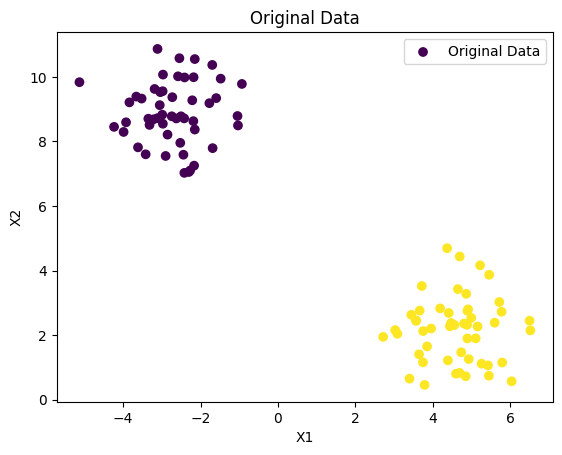

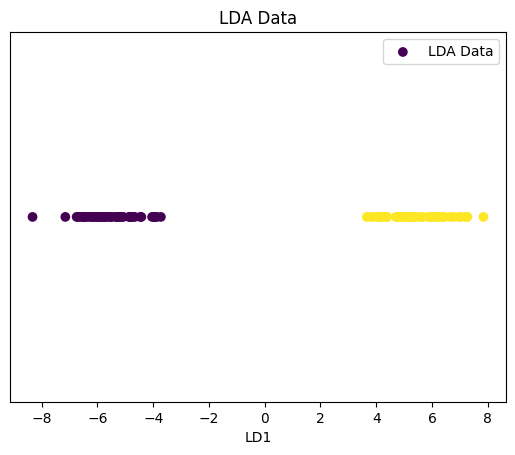

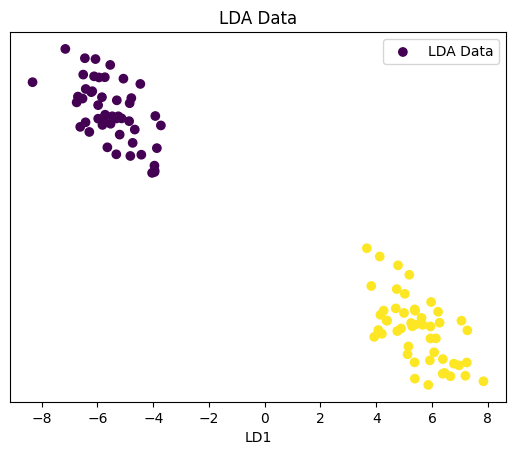

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Generate 2D data
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=42)

# Perform Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

# Plot the original data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', label='Original Data')
plt.title('Original Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# Plot the LDA-transformed data
plt.scatter(X_lda[:, 0], np.zeros_like(X_lda[:, 0]), c=y, cmap='viridis', label='LDA Data')
plt.title('LDA Data')
plt.xlabel('LD1')
plt.yticks([])
plt.legend()
plt.show()

# Plot the LDA-transformed data
plt.scatter(X_lda[:, 0], X[:, 1], c=y, cmap='viridis', label='LDA Data')
plt.title('LDA Data')
plt.xlabel('LD1')
plt.yticks([])
plt.legend()
plt.show()

# Seaborn

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df_fmri = sns.load_dataset('fmri', cache=True, data_home=None)

In [ ]:
df_fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [ ]:
subject_counts = df_fmri.subject.value_counts()

In [ ]:
# custom_style = {'axes.labelcolor': 'black',
#                 'xtick.color': 'black',
#                 'ytick.color': 'black'}
# custom_colors = {
#     'axes.facecolor': 'black',
#     'axes.edgecolor': 'black',
#     'axes.labelcolor': 'black',
#     'grid.color': 'gray',
#     'xtick.color': 'black',
#     'ytick.color': 'black',
#     'text.color': 'black'
# }
# sns.set_style("whitegrid", rc=custom_colors)
# sns.set_style('whitegrid', {'axes.facecolor': '#000000'})  # Use your desired color

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

<Axes: >

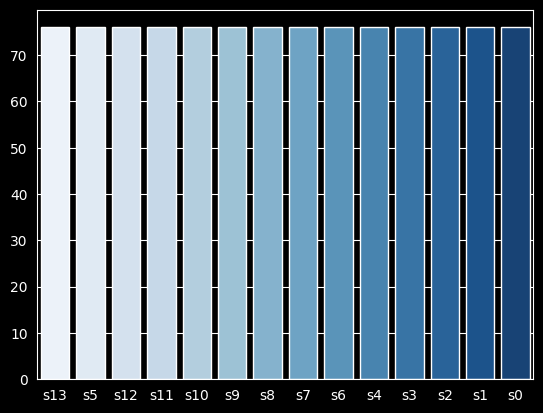

In [ ]:
sns.barplot(x = subject_counts.index, y = subject_counts.values, data = df_fmri, palette = "Blues")

<Axes: xlabel='subject', ylabel='count'>

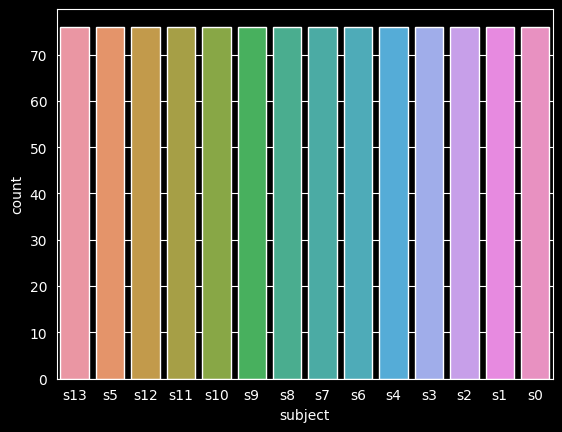

In [ ]:
sns.countplot(x = "subject", data = df_fmri)

In [ ]:
series_fmri = pd.DataFrame(df_fmri.sort_values('signal').reset_index().signal)

In [ ]:
series_fmri

,signal
0,-0.255486
1,-0.238474
2,-0.224351
3,-0.181241
4,-0.178510
...,...
1059,0.455575
1060,0.460896
1061,0.476055
1062,0.494787


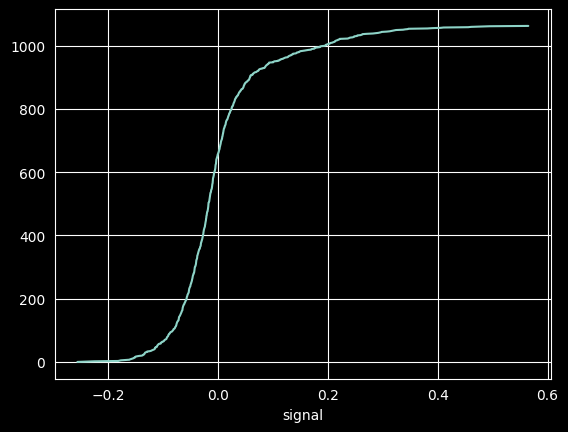

In [ ]:
_= sns.lineplot(x = 'signal', y = series_fmri.index, data = series_fmri)

In [ ]:
df_iris = sns.load_dataset('iris', cache=True, data_home=None)

In [ ]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

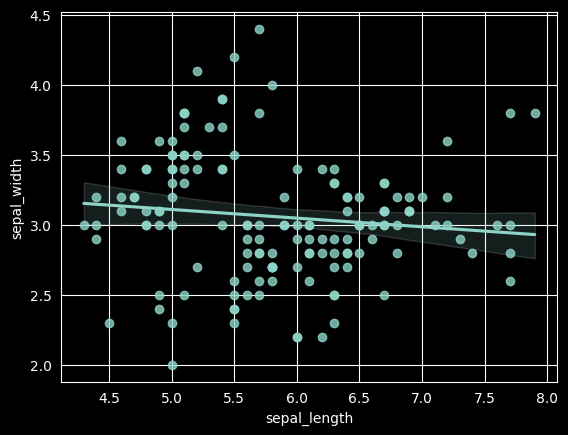

In [ ]:

sns.regplot(x = "sepal_length", y = "sepal_width", data = df_iris)

<ipython-input-35-3a6ea7146aac>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_iris, x='sepal_length', bins=15, kde=False, palette = "OrRd")


<Axes: xlabel='sepal_length', ylabel='Count'>

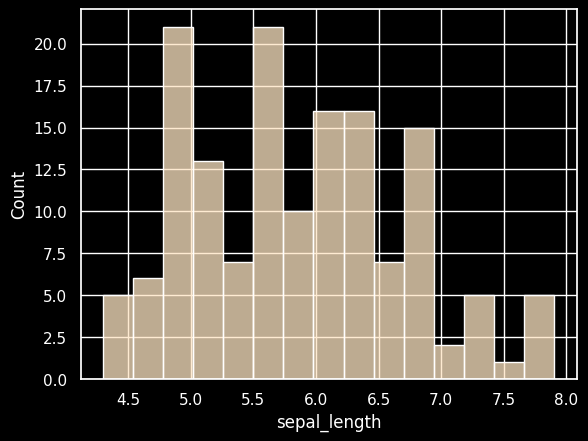

In [ ]:
# Create a histogram plot using Seaborn
sns.histplot(data=df_iris, x='sepal_length', bins=15, kde=False, palette = "OrRd")

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

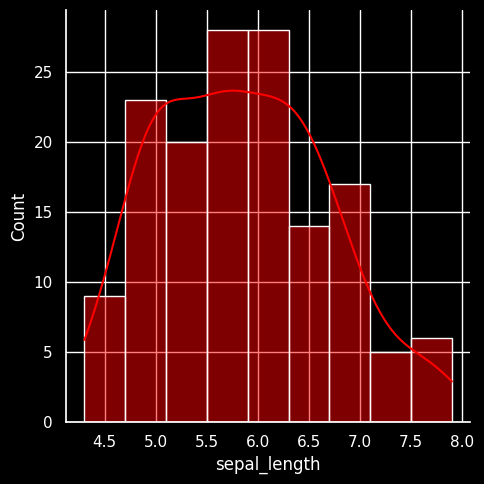

In [ ]:
# sns.displot(df_iris.sepal_length,color = "b",kde = True)
sns.displot(df_iris.sepal_length,color = "r",kde = True)

# Map and Lambda

In [ ]:
print (list(map(len, ['Tina', 'Raj', 'Tom'])))

[4, 3, 3]


In [ ]:
sum = lambda a, b, c: a + b + c
sum(1, 2, 3)

6

In [ ]:
twice = lambda a : a + a
print(list(map(twice, [2,5])))

[4, 10]


In [ ]:
cube = lambda x: x * x * x # complete the lambda function

def fibonacci(n):
    # return a list of fibonacci numbers
    a = 0
    b = 1
    l = []
    if ( n == 0):
        pass
        # l.append(0)
    if ( n == 1 ):
        l.append(0)
        # l.append(1)
    if ( n != 0 and n != 1):
        l.append(0)
        l.append(1)
        for i in range(n-2):
            c = a + b
            b,a= c,b
            l.append(c)
    return (l)

print(list(map(cube, fibonacci(6))))

[0, 1, 1, 8, 27, 125]


drop on axis == 1 in dataframe

In [ ]:
# df = pd.DataFrame()
# df.drop(labels = flag_col, axis = 1)

In [ ]:
def array_operations(arr):
    # Calculate the sum of the elements in the array
    sum_of_elements = sum(arr)

    # Find the maximum element in the array
    max_element = max(arr)

    # Find the minimum element in the array
    min_element = min(arr)

    # Calculate the average of the elements in the array
    average = sum_of_elements / len(arr)

    # Create a dictionary to store the results
    results = {
        'sum': sum_of_elements,
        'max': max_element,
        'min': min_element,
        'average': average
    }

    return results

# Example array
my_array = [10, 20, 30, 40, 50]

# Call the function with the array as an argument
result = array_operations(my_array)

# Print the results
print("Array Operations Results:")
print("Sum:", result['sum'])
print("Maximum:", result['max'])
print("Minimum:", result['min'])
print("Average:", result['average'])


Array Operations Results:
Sum: 150
Maximum: 50
Minimum: 10
Average: 30.0


In [ ]:
import pandas as pd

# Create a sample DataFrame in wide format
data = {
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Math_Score': [90, 88, 75],
    'English_Score': [85, 92, 78],
    'Science_Score': [88, 90, 82]
}

df_wide = pd.DataFrame(data)

# Use pd.melt to reshape the DataFrame from wide to long format
df_long = pd.melt(df_wide, id_vars=['ID', 'Name'], var_name='Subject', value_name='Score')

print(df_long)

   ID     Name        Subject  Score
0   1    Alice     Math_Score     90
1   2      Bob     Math_Score     88
2   3  Charlie     Math_Score     75
3   1    Alice  English_Score     85
4   2      Bob  English_Score     92
5   3  Charlie  English_Score     78
6   1    Alice  Science_Score     88
7   2      Bob  Science_Score     90
8   3  Charlie  Science_Score     82


In [ ]:
import pandas as pd

# Create two sample DataFrames
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'ID': [2, 3, 4], 'Age': [25, 30, 22]})

# Use pd.merge to merge the DataFrames based on the 'ID' column
merged_df = pd.merge(df1, df2, on='ID', how='inner')

print(merged_df)


   ID     Name  Age
0   2      Bob   25
1   3  Charlie   30


In [ ]:
left_df = pd.merge(df1, df2, on='ID', how='left')

print(left_df)

   ID     Name   Age
0   1    Alice   NaN
1   2      Bob  25.0
2   3  Charlie  30.0


# Apply and Group by

In [ ]:
import pandas as pd
import numpy as np

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David','Alice', 'Bob', 'Charlie', 'David'],
    'Salary': [50000, 60000, 75000, 45000, 30000, 28000, 52000, 67000],
    'Age': [28, 35, 30, 22, np.nan, np.nan, np.nan, np.nan]
}

df = pd.DataFrame(data)

## fill in the Age column with age greater than one for the same employee
df['Age'] = df.groupby(['Name'])['Age'].transform(lambda x: x.fillna(x.mean()  + 1))

df

,Name,Salary,Age
0,Alice,50000,28.0
1,Bob,60000,35.0
2,Charlie,75000,30.0
3,David,45000,22.0
4,Alice,30000,29.0
5,Bob,28000,36.0
6,Charlie,52000,31.0
7,David,67000,23.0


In [ ]:
from datetime import datetime, timedelta
# create array of start date 4 times
start_date = datetime(2023, 1, 1)
date_list = [start_date for x in range(0, 4)]
# date_list
next_year_date = start_date + timedelta(days=365)
next_year_date_list = [next_year_date for x in range(0, 4)]
all_dates = date_list + next_year_date_list
# all_dates
df['Date'] = all_dates
print(df)

      Name  Salary  Age       Date
0    Alice   50000   28 2023-01-01
1      Bob   60000   35 2023-01-01
2  Charlie   75000   30 2023-01-01
3    David   45000   22 2023-01-01
4    Alice   30000   29 2024-01-01
5      Bob   28000   36 2024-01-01
6  Charlie   52000   31 2024-01-01
7    David   67000   22 2024-01-01


In [ ]:
# Define additional data for three more months
additional_data = {
    'Name': ['Eva', 'Frank', 'Grace'],
    'Salary': [58000, 62000, 72000],
    'Age': [27, 34, 29],
    'Date': [start_date for i in range(4, 7)]  # Adding three more months
}

# Create a DataFrame for the additional data
additional_df = pd.DataFrame(additional_data)

# Concatenate the original DataFrame and the additional data
df = pd.concat([df, additional_df], ignore_index=True)

print(df)


       Name  Salary  Age       Date
0     Alice   50000   28 2023-01-01
1       Bob   60000   35 2023-01-01
2   Charlie   75000   30 2023-01-01
3     David   45000   22 2023-01-01
4     Alice   30000   29 2024-01-01
5       Bob   28000   36 2024-01-01
6   Charlie   52000   31 2024-01-01
7     David   67000   22 2024-01-01
8       Eva   58000   27 2023-01-01
9     Frank   62000   34 2023-01-01
10    Grace   72000   29 2023-01-01


**Example 1.1: Applying a Function to a Column:**

In [ ]:
# Define a function to calculate the annual bonus based on salary
def calculate_bonus(salary):
    return salary * 0.1

# Apply the function to the 'Salary' column
df['Bonus'] = df['Salary'].apply(calculate_bonus)


**Example 1.2: Applying a Function to a Row:**

In [ ]:
# Define a function to categorize employees based on age
def categorize_age(row):
    if row['Age'] <= 30:
        return 'Young'
    else:
        return 'Experienced'

# Apply the function to each row
df['Age Category'] = df.apply(categorize_age, axis=1)


**Example 2.1: Using Lambda with apply:**

In [ ]:
# Calculate the tax for each employee's salary using a lambda function
df['Tax'] = df['Salary'].apply(lambda salary: salary * 0.2)

**Example 3.1: Using Applymap**

In [ ]:
# Define a function to capitalize the names
def capitalize_name(name):
    return name.upper()

# Apply the function to all elements of the DataFrame
df['Name'] = df[['Name']].applymap(capitalize_name)


In [ ]:
# Convert all elements of the 'Age' column to months using a lambda function
df['SalaryPerMonth'] = df[['Salary']].applymap(lambda var: round(var / 12,2))
print(df)


       Name  Salary  Age       Date   Bonus Age Category      Tax  \
0     ALICE   50000   28 2023-01-01  5000.0        Young  10000.0   
1       BOB   60000   35 2023-01-01  6000.0  Experienced  12000.0   
2   CHARLIE   75000   30 2023-01-01  7500.0        Young  15000.0   
3     DAVID   45000   22 2023-01-01  4500.0        Young   9000.0   
4     ALICE   30000   29 2024-01-01  3000.0        Young   6000.0   
5       BOB   28000   36 2024-01-01  2800.0  Experienced   5600.0   
6   CHARLIE   52000   31 2024-01-01  5200.0  Experienced  10400.0   
7     DAVID   67000   22 2024-01-01  6700.0        Young  13400.0   
8       EVA   58000   27 2023-01-01  5800.0        Young  11600.0   
9     FRANK   62000   34 2023-01-01  6200.0  Experienced  12400.0   
10    GRACE   72000   29 2023-01-01  7200.0        Young  14400.0   

    SalaryPerMonth  
0          4166.67  
1          5000.00  
2          6250.00  
3          3750.00  
4          2500.00  
5          2333.33  
6          4333.33  
7  

**Example 4.1: Group by**

In [ ]:
# Group the DataFrame by "Age Category" and calculate the mean salary for each group
grouped = df.groupby('Age Category')['Name'].count()
print(grouped)

Age Category
Experienced    4
Young          7
Name: Name, dtype: int64


In [ ]:
grouped_count = df.groupby('Name')['Salary'].mean()
print(grouped_count)

Name
ALICE      40000.0
BOB        44000.0
CHARLIE    63500.0
DAVID      56000.0
EVA        58000.0
FRANK      62000.0
GRACE      72000.0
Name: Salary, dtype: float64
